### The file used for Activity Recognition using Weizman Dataset

# Human Activity Recognition

## Obtain the input files

In [1]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
# Loading the data
raw_data = load_files(os.getcwd() + r'/../Data1', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=34, random_state=3)

valid_files = train_files[100:]
valid_targets = train_targets[100:]

train_files = train_files[:100]
train_targets = train_targets[:100]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

Total number of videos: 170

Number of videos in training data: 100
Number of videos in validation data: 36
Number of videos in test data: 34


### Description of the class labels

In [2]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(10), raw_data['target_names']):
    print(label)


The categorical labels are converted into integers.
Following is the mapping - 

(0, 'bend')
(1, 'jack')
(2, 'jump')
(3, 'pjump')
(4, 'run')
(5, 'side')
(6, 'skip')
(7, 'walk')
(8, 'wave1')
(9, 'wave2')


### Each video file is associated with its class label

In [3]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('d:\\APP\\Activity_Recognition_3D_CNN/../Data1\\run\\eli_run(copy).avi', 4)
('d:\\APP\\Activity_Recognition_3D_CNN/../Data1\\bend\\eli_bend.avi', 0)
('d:\\APP\\Activity_Recognition_3D_CNN/../Data1\\wave2\\eli_wave2(copy).avi', 9)
('d:\\APP\\Activity_Recognition_3D_CNN/../Data1\\wave1\\lyova_wave1(copy).avi', 8)
('d:\\APP\\Activity_Recognition_3D_CNN/../Data1\\wave2\\ido_wave2(copy).avi', 9)



Shape of the sample data: (76, 144, 180, 3)


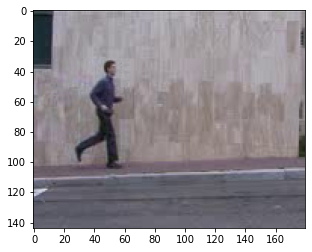

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[10])

In [5]:
sec=2
frames_needed=20

In [6]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
import cv2
def read_video_bgsub(path):

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [7]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
def read_video(path):
        

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [8]:
def read_videos(paths):
        
        list_of_videos = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [9]:
def read_videos_bgsub(paths):
        
        list_of_videos = []
        list_of_videos = [
            read_video_bgsub(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [10]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=10)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)
#print(X_train)
print(y_train)

100%|██████████| 100/100 [00:15<00:00,  6.65it/s]

Shape of training data: (100, 20, 20, 20, 1)
Shape of training labels: (100, 10)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.

In [11]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=10)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)
#print(X_valid)
print(y_valid)

100%|██████████| 36/36 [00:05<00:00,  6.71it/s]

Shape of validation data: (36, 20, 20, 20, 1)
Shape of validation labels: (36, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 

In [12]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=10)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)
print(y_test)

100%|██████████| 34/34 [00:05<00:00,  6.64it/s]

Shape of testing data: (34, 20, 20, 20, 1)
Shape of testing labels: (34, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

In [13]:
X_train_bgsub = read_videos_bgsub(train_files)
y_train_bgsub = to_categorical(train_targets, num_classes=10)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 100/100 [00:18<00:00,  5.39it/s]


Shape of training data: (100, 20, 20, 20, 1)
Shape of training labels: (100, 10)


In [14]:
X_test_bgsub = read_videos_bgsub(test_files)
y_test_bgsub = to_categorical(test_targets, num_classes=10)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 34/34 [00:06<00:00,  5.58it/s]

Shape of testing data: (34, 20, 20, 20, 1)
Shape of testing labels: (34, 10)


In [15]:
X_valid_bgsub = read_videos_bgsub(valid_files)
y_valid_bgsub = to_categorical(valid_targets, num_classes=10)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████| 36/36 [00:06<00:00,  5.40it/s]

Shape of validation data: (36, 20, 20, 20, 1)
Shape of validation labels: (36, 10)


Class of 1st video: 4


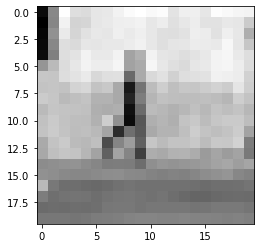

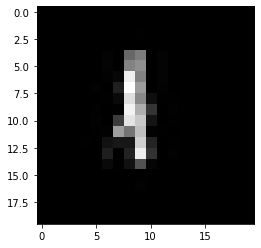

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

# Model 1 without BG Subtraction

In [45]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1 = Sequential()

# Adding Alternate convolutional and pooling layers
model1.add(Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model1.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))


model1.add(GlobalAveragePooling3D())

model1.add(Dense(32, activation='relu'))

model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 18, 18, 18, 16)    448       
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 9, 9, 9, 16)      0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 9, 9, 9, 64)       27712     
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 5, 5, 5, 64)      0         
 3D)                                                             
                                                                 
 global_average_pooling3d_2   (None, 64)               0         
 (GlobalAveragePooling3D)                                        
                                                      

### Training Model - 1

In [46]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint1 = ModelCheckpoint(filepath='W_Model_1.weights.best.hdf5', save_best_only=True, verbose=1)


history1 = model1.fit(X_train, y_train, batch_size=15, epochs=600, validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint1])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Epoch 1/600

Epoch 00001: val_loss improved from inf to 2.30998, saving model to W_Model_1.weights.best.hdf5
7/7 - 2s - loss: 2.3123 - accuracy: 0.1200 - val_loss: 2.3100 - val_accuracy: 0.0556 - 2s/epoch - 266ms/step
Epoch 2/600

Epoch 00002: val_loss improved from 2.30998 to 2.30981, saving model to W_Model_1.weights.best.hdf5
7/7 - 1s - loss: 2.3019 - accuracy: 0.1400 - val_loss: 2.3098 - val_accuracy: 0.0556 - 1s/epoch - 209ms/step
Epoch 3/600

Epoch 00003: val_loss improved from 2.30981 to 2.30812, saving model to W_Model_1.weights.best.hdf5
7/7 - 1s - loss: 2.3009 - accuracy: 0.1400 - val_loss: 2.3081 - val_accuracy: 0.0556 - 1s/epoch - 209ms/step
Epoch 4/600

Epoch 00004: val_loss did not improve from 2.30812
7/7 - 1s - loss: 2.3002 - accuracy: 0.1600 - val_loss: 2.3086 - val_accuracy: 0.0556 - 1s/epoch - 188ms/step
Epoch 5/600

Epoch 00005: val_loss did not improve from 2.30812
7/7 - 1s - loss: 2.2995 - accuracy: 0.0800 - val_loss: 2.3081 - val_accuracy: 0.0556 - 1s/epoch - 189

### Evaluating Model - 1

In [47]:
# Loading the model that performed the best on the validation set
model1.load_weights('W_Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss1, accuracy1) = model1.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1 * 100))

Accuracy on test data: 23.53%


## Model - 1 Performance



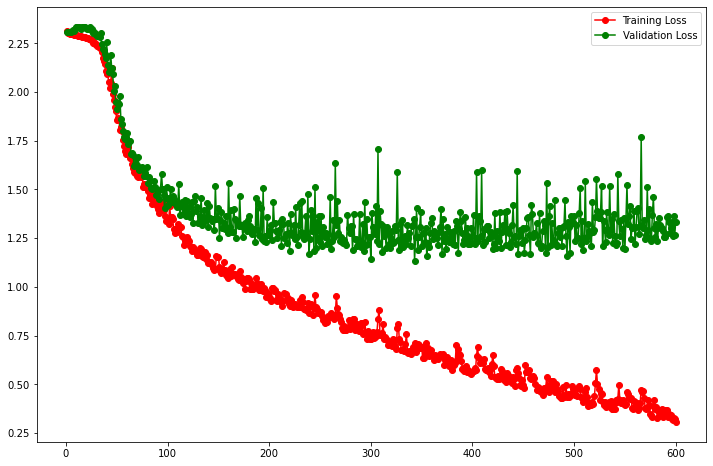

In [48]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss1 = history1.history['loss']                          # Loss on the training data
val_loss1 = history1.history['val_loss']                  # Loss on the validation data
epochs = range(1,601)

plt.plot(epochs, loss1, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-', label = 'Validation Loss')
plt.legend()

In [49]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


Normalized confusion matrix


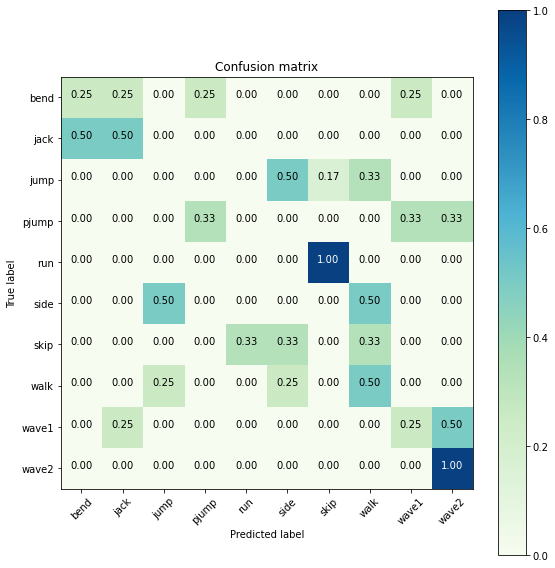

In [50]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict(X_test);
y_predictions = np.argmax(y_predictions, axis=1);
y_pred=to_categorical(y_predictions, num_classes=10).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['bend','jack','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


# Model 1, With BG Subtraction

In [51]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model1_bg.add(Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model1_bg.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))


model1_bg.add(GlobalAveragePooling3D())

model1_bg.add(Dense(32, activation='relu'))

model1_bg.add(Dense(10, activation='softmax'))

model1_bg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_6 (Conv3D)           (None, 18, 18, 18, 16)    448       
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 9, 9, 9, 16)      0         
 3D)                                                             
                                                                 
 conv3d_7 (Conv3D)           (None, 9, 9, 9, 64)       27712     
                                                                 
 max_pooling3d_7 (MaxPooling  (None, 5, 5, 5, 64)      0         
 3D)                                                             
                                                                 
 global_average_pooling3d_3   (None, 64)               0         
 (GlobalAveragePooling3D)                                        
                                                      

In [52]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint_bg = ModelCheckpoint(filepath='W_Model_1_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history1_bg = model1_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=600, validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint_bg])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Epoch 1/600
7/7 [==============================] - ETA: 0s - loss: 2.3014 - accuracy: 0.0900
Epoch 00001: val_loss improved from inf to 2.27397, saving model to W_Model_1_bg.weights.best.hdf5
7/7 [==============================] - 2s 225ms/step - loss: 2.3014 - accuracy: 0.0900 - val_loss: 2.2740 - val_accuracy: 0.1389
Epoch 2/600
7/7 [==============================] - ETA: 0s - loss: 2.2806 - accuracy: 0.1100
Epoch 00002: val_loss improved from 2.27397 to 2.26006, saving model to W_Model_1_bg.weights.best.hdf5
7/7 [==============================] - 1s 211ms/step - loss: 2.2806 - accuracy: 0.1100 - val_loss: 2.2601 - val_accuracy: 0.1667
Epoch 3/600
7/7 [==============================] - ETA: 0s - loss: 2.2622 - accuracy: 0.2000
Epoch 00003: val_loss improved from 2.26006 to 2.22918, saving model to W_Model_1_bg.weights.best.hdf5
7/7 [==============================] - 2s 244ms/step - loss: 2.2622 - accuracy: 0.2000 - val_loss: 2.2292 - val_accuracy: 0.1667
Epoch 4/600
7/7 [============

In [53]:
model1_bg.load_weights('W_Model_1_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model1_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 82.35%


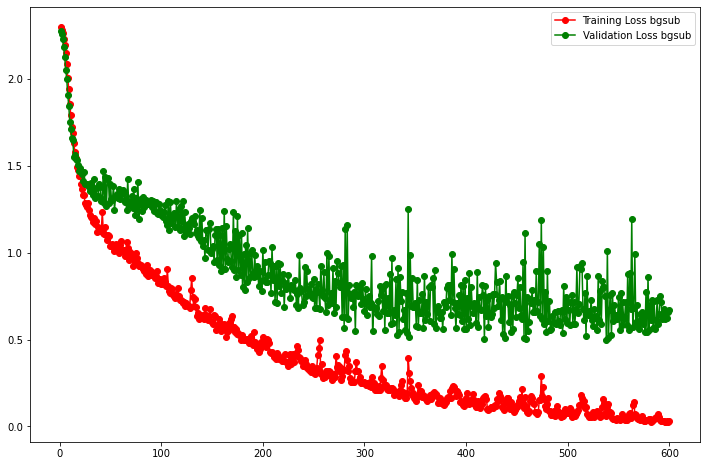

In [54]:
plt.figure(figsize=(12, 8))

loss1_bg = history1_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history1_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,601)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.legend()

[5 5 8 0 2 6 2 7 9 3 0 6 1 0 5 7 8 9 2 7 6 5 8 2 2 8 0 3 2 6 7 6 3 1]
[6 5 8 0 2 2 2 5 9 3 0 4 1 0 5 7 8 9 2 7 4 5 8 2 7 8 0 3 2 6 7 6 3 1]
Normalized confusion matrix


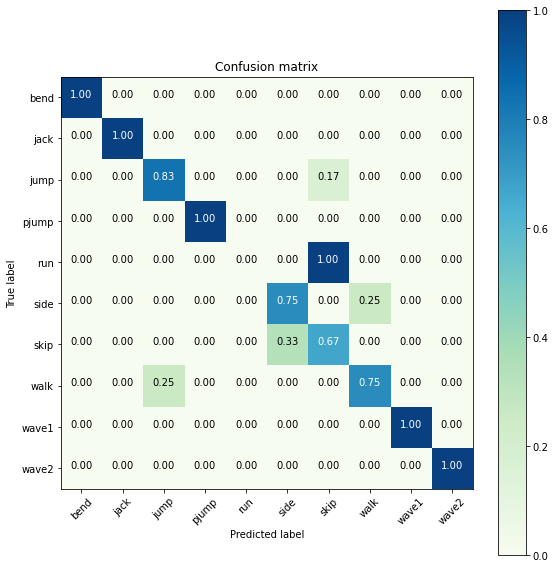

In [55]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1_bg.predict(X_test_bgsub);
y_predictions = np.argmax(y_predictions, axis=1);
y_pred=to_categorical(y_predictions, num_classes=10).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
print(y_predictions)
print(np.argmax(y_test, axis=1))
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['bend','jack','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


## Comparision of Model1 with BG-sub and without BG-sub

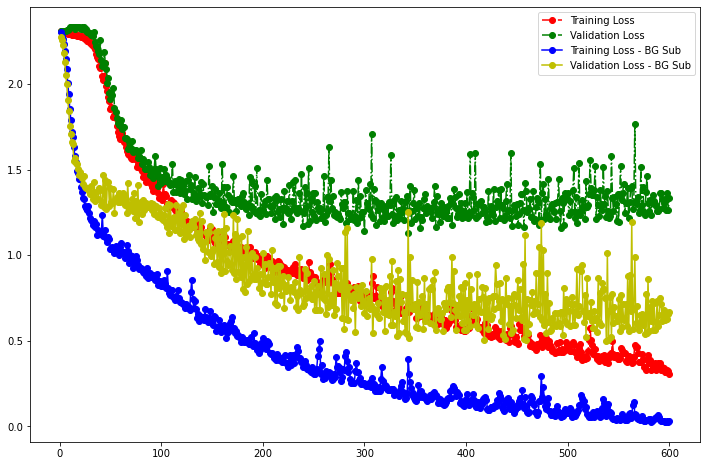

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss1, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss1_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss1_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.legend()

## Model - 2


### Training Model - 2


### Evaluating Model - 2

Evaluating `Model-2` on the test data.

## Model - 2 Performance



# Model 2 - With BG

# The model that worked

## Model3 BG Subtraction

# Ignore the below models